# WeatherPy

---

## Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
# np.random.uniform(range1, range2, size)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
# zip(list1, list2): to combine both 'lats', and 'lngs' [lists]
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
# FOr loop in 'lat_lngs' and using [citipy.nearest_city] & [.city_name] to 
# figure out the nearest city and its name from the latitudes and longtitudes.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    # Using [.append()] to add the 'city' variable in to 'cities' 
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# F "" to concatenate the string with len of a variable 
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
# [Print()] to print out a message
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
# Variables 'record_count' & 'set_count' set to 1
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [4]:

# Loop through all the cities in our list to fetch weather data
# [enumerate()] is used to iterate through 'cities' and grab the 'index' and 'city value'
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #! Used an f"" to concatenate text and values from variables to create a website
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # <requests.get()> function for making a GET request 
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        # Gathers the 'lat' value from the {coord} from the 'city_weather'
        city_lat = city_weather["coord"]["lat"]
        # Gathers the 'lon' value from the {coord} from the 'city_weather'
        city_lng = city_weather["coord"]["lon"]
        # Gathers the 'temp_max' value from the {main} from the 'city_weather'
        city_max_temp = city_weather["main"]["temp_max"]
        # Gathers the 'humidity' value from the {main} from the 'city_weather'
        city_humidity = city_weather["main"]["humidity"]
        # Gathers the 'all' value from the {clouds} from the 'city_weather'
        city_clouds = city_weather["clouds"]["all"]
        # Gathers the 'speed' value from the {wind} from the 'city_weather'
        city_wind = city_weather["wind"]["speed"]
        # Gathers the 'country' value from the {sys} from the 'city_weather'
        city_country = city_weather["sys"]["country"]
        # Gathers the 'dt' value from the 'city_weather'
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | sundumbili


Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | magadan
Processing Record 9 of Set 1 | samoylovka
Processing Record 10 of Set 1 | vila franca do campo
Processing Record 11 of Set 1 | beidao
Processing Record 12 of Set 1 | vila velha
Processing Record 13 of Set 1 | ad dilam
Processing Record 14 of Set 1 | suntar
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | poronaysk
Processing Record 17 of Set 1 | saipan
Processing Record 18 of Set 1 | toumodi
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | geraldton
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 1 | olonkinbyen
Processing Record 24 of Set 1 | amga
Processing Record 25 of S

In [5]:
city_url

'http://api.openweathermap.org/data/2.5/weather?q=fukuecho&appid=a2e646057e6a616a5ccdf60228e381ff&units=imperial'

In [6]:
# Convert the cities weather data into a Pandas DataFrame
# <pd.DataFrame()> 
# used to create a pandas DataFrame from the 'city_data' {}
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sundumbili,-29.1337,31.3975,72.43,90,90,7.56,ZA,1706484011
1,port-aux-francais,-49.3500,70.2167,40.87,66,92,32.35,TF,1706484011
2,adamstown,-25.0660,-130.1015,76.14,77,100,10.74,PN,1706484012
3,blackmans bay,-43.0167,147.3167,71.73,57,5,5.88,AU,1706484012
4,ushuaia,-54.8000,-68.3000,60.46,44,40,11.50,AR,1706484013


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sundumbili,-29.1337,31.3975,72.43,90,90,7.56,ZA,1706484011
1,port-aux-francais,-49.3500,70.2167,40.87,66,92,32.35,TF,1706484011
2,adamstown,-25.0660,-130.1015,76.14,77,100,10.74,PN,1706484012
3,blackmans bay,-43.0167,147.3167,71.73,57,5,5.88,AU,1706484012
4,ushuaia,-54.8000,-68.3000,60.46,44,40,11.50,AR,1706484013


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

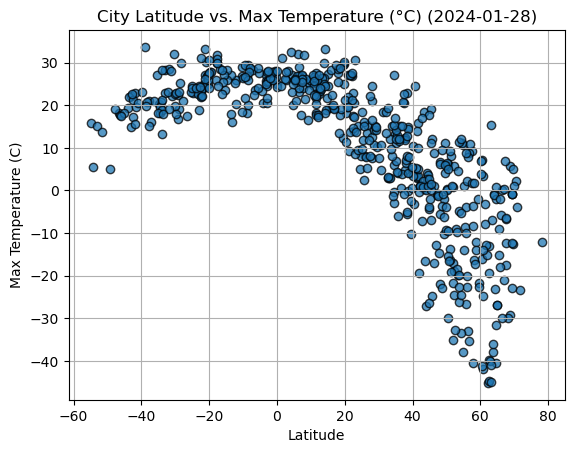

In [10]:
# Build scatter plot for latitude vs. temperature
formatted_date = time.strftime('%Y-%m-%d', time.gmtime(city_data_df['Date'].iloc[0]))
 # < plt.scatter( x_data, y_data, marker='o', label='Data Points' ) > 
plt.scatter(city_data_df["Lat"], (city_data_df["Max Temp"] - 32) * 5/9, edgecolors='black', alpha=0.75)
# Incorporate the other graph properties
# plt.title() to title the plot 
plt.title(f"City Latitude vs. Max Temperature (°C) ({formatted_date})")
# plt.xlabel() to title the x axis
plt.xlabel("Latitude")
# plt.ylabel() to title the y axis
plt.ylabel("Max Temperature (C)")
# plt.grid() to add gridlines to the plot
plt.grid(True)

# Save the figure
# plt.savefig() to save to the desired folder
plt.savefig("output_data/Fig1.png")

# Show plot
# plt.show() to display the plot 
plt.show()

#### Latitude Vs. Humidity

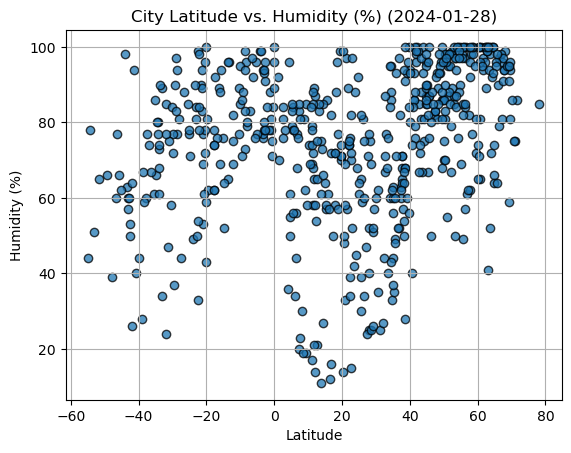

In [11]:
# Build the scatter plots for latitude vs. humidity
 # < plt.scatter( x_data, y_data, marker='o', label='Data Points' ) > 
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
# plt.title() to title the plot 
plt.title(f"City Latitude vs. Humidity (%) ({formatted_date})")
# plt.xlabel() to title the x axis
plt.xlabel("Latitude")
# plt.ylabel() to title the y axis
plt.ylabel("Humidity (%)")
# plt.grid() to add gridlines to the plot
plt.grid(True)

# Save the figure
# plt.savefig() to save to the desired folder
plt.savefig("output_data/Fig2.png")

# Show plot
# plt.show() to display the plot 
plt.show()

#### Latitude Vs. Cloudiness

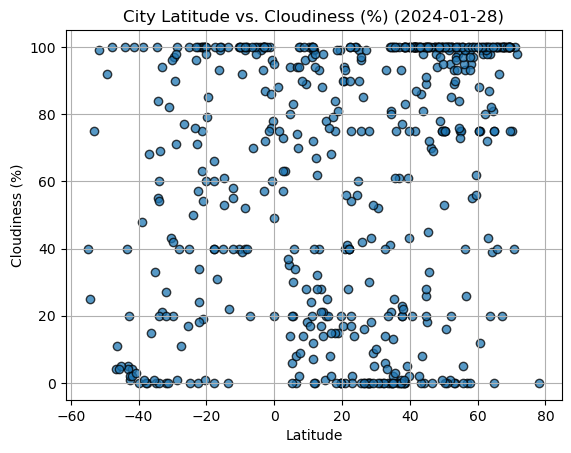

In [12]:
# Build the scatter plots for latitude vs. cloudiness
 # < plt.scatter( x_data, y_data, marker='o', label='Data Points' ) > 
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
# plt.title() to title the plot 
plt.title(f"City Latitude vs. Cloudiness (%) ({formatted_date})")
# plt.xlabel() to title the x axis
plt.xlabel("Latitude")
# plt.ylabel() to title the y axis
plt.ylabel("Cloudiness (%)")
# plt.grid() to add gridlines to the plot
plt.grid(True)

# Save the figure
# plt.savefig() to save to the desired folder
plt.savefig("output_data/Fig3.png")

# Show plot
# plt.show() to display the plot 
plt.show()

#### Latitude vs. Wind Speed Plot

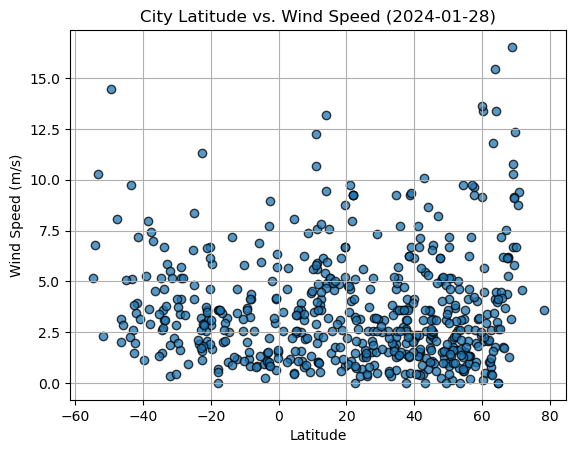

In [13]:
# Build the scatter plots for latitude vs. wind speed
 # < plt.scatter( x_data, y_data, marker='o', label='Data Points' ) > 
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"] * 0.44704, edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
# plt.title() to title the plot 
plt.title(f"City Latitude vs. Wind Speed ({formatted_date})")
# plt.xlabel() to title the x axis
plt.xlabel("Latitude")
# plt.ylabel() to title the y axis
plt.ylabel("Wind Speed (m/s)")
# plt.grid() to add gridlines to the plot
plt.grid(True)

# Save the figure
# plt.savefig() to save to the desired folder
plt.savefig("output_data/Fig4.png")

# Show plot
# plt.show() to display the plot 
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# <linregress> funciton from scipy.stats library to perform linear regression analysis
# <pe_slope> the slope regression line
# <pe_int> representing the value of y when x is 0 (intercept)
# <pe_r> The correlation coefficient indication strength and direction of 'x_values' and 'y_values'
# <pe_p> The two sides p=value for a hypothesis test whose null hypothesis that the slope is zero
# <pe_std_err> The standard error of the mean
temp_regression = linregress(city_data_df["Lat"], (city_data_df["Max Temp"] - 32) * 5/9)
temp_slope, temp_intercept, temp_r_value, temp_p_value, temp_std_err = temp_regression
temp_regression_line = temp_slope * city_data_df["Lat"] + temp_intercept
temp_regression_line

City_ID
0      29.730411
1      37.625533
2      28.141842
3      35.152173
4      39.753935
         ...    
557     6.985095
558    -4.239785
559    -5.139533
560    18.397665
561     5.586989
Name: Lat, Length: 562, dtype: float64

In [15]:
# <linregress> funciton from scipy.stats library to perform linear regression analysis
# <pe_slope> the slope regression line
# <pe_int> representing the value of y when x is 0 (intercept)
# <pe_r> The correlation coefficient indication strength and direction of 'x_values' and 'y_values'
# <pe_p> The two sides p=value for a hypothesis test whose null hypothesis that the slope is zero
# <pe_std_err> The standard error of the mean
humidity_regression = linregress(city_data_df["Lat"], city_data_df["Humidity"])
humidity_slope, humidity_intercept, humidity_r_value, humidity_p_value, humidity_std_err = humidity_regression
humidity_regression_line = humidity_slope * city_data_df["Lat"] + humidity_intercept
humidity_regression_line

City_ID
0      66.432042
1      63.030327
2      67.116497
3      64.096006
4      62.113277
         ...    
557    76.232154
558    81.068539
559    81.456206
560    71.314901
561    76.834546
Name: Lat, Length: 562, dtype: float64

In [16]:
# <linregress> funciton from scipy.stats library to perform linear regression analysis
# <pe_slope> the slope regression line
# <pe_int> representing the value of y when x is 0 (intercept)
# <pe_r> The correlation coefficient indication strength and direction of 'x_values' and 'y_values'
# <pe_p> The two sides p=value for a hypothesis test whose null hypothesis that the slope is zero
# <pe_std_err> The standard error of the mean
cloudy_regression = linregress(city_data_df["Lat"], city_data_df["Cloudiness"])
cloudy_slope, cloudy_intercept, cloudy_r_value, cloudy_p_value, cloudy_std_err = cloudy_regression
cloudy_regression_line = cloudy_slope * city_data_df["Lat"] + cloudy_intercept
cloudy_regression_line

City_ID
0      48.247606
1      42.706401
2      49.362546
3      44.442333
4      41.212578
         ...    
557    64.211447
558    72.089649
559    72.721139
560    56.201514
561    65.192710
Name: Lat, Length: 562, dtype: float64

In [17]:
# <linregress> funciton from scipy.stats library to perform linear regression analysis
# <pe_slope> the slope regression line
# <pe_int> representing the value of y when x is 0 (intercept)
# <pe_r> The correlation coefficient indication strength and direction of 'x_values' and 'y_values'
# <pe_p> The two sides p=value for a hypothesis test whose null hypothesis that the slope is zero
# <pe_std_err> The standard error of the mean
wind_speed_regression = linregress(city_data_df["Lat"], city_data_df["Wind Speed"] * 0.44704)
wind_speed_slope, wind_speed_intercept, wind_speed_r_value, wind_speed_p_value, wind_speed_std_err = wind_speed_regression
wind_speed_regression_line = wind_speed_slope * city_data_df["Lat"] + wind_speed_intercept
wind_speed_regression_line

City_ID
0      3.499479
1      3.477558
2      3.503889
3      3.484425
4      3.471649
         ...   
557    3.562629
558    3.593795
559    3.596293
560    3.530943
561    3.566511
Name: Lat, Length: 562, dtype: float64

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,iqaluit,63.7506,-68.5145,-36.31,52,20,9.22,CA,1706484013
7,magadan,59.5667,150.8000,-6.90,72,62,5.28,RU,1706484014
8,samoylovka,51.1840,43.7081,7.45,95,100,4.68,RU,1706484014
9,vila franca do campo,37.7167,-25.4333,54.01,68,77,3.15,PT,1706484014
10,beidao,34.5686,105.8933,26.73,88,21,4.34,CN,1706484014


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sundumbili,-29.1337,31.3975,72.43,90,90,7.56,ZA,1706484011
1,port-aux-francais,-49.3500,70.2167,40.87,66,92,32.35,TF,1706484011
2,adamstown,-25.0660,-130.1015,76.14,77,100,10.74,PN,1706484012
3,blackmans bay,-43.0167,147.3167,71.73,57,5,5.88,AU,1706484012
4,ushuaia,-54.8000,-68.3000,60.46,44,40,11.50,AR,1706484013


###  Temperature vs. Latitude Linear Regression Plot

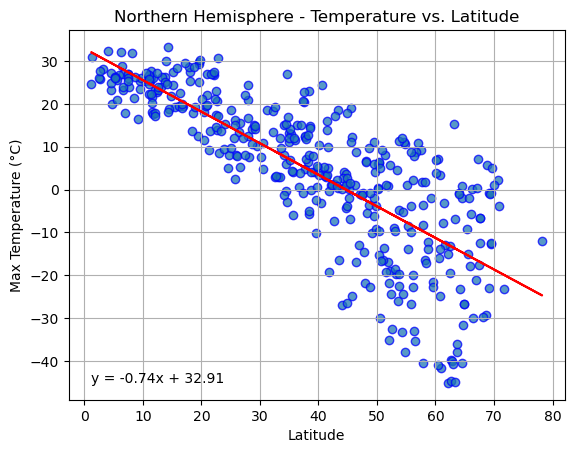

The r-value is: -0.7900267447179184 


In [20]:
# Linear regression on Northern Hemisphere
# <linregress> funciton from scipy.stats library to perform linear regression analysis
# <pe_slope> the slope regression line
# <pe_int> representing the value of y when x is 0 (intercept)
# <pe_r> The correlation coefficient indication strength and direction of 'x_values' and 'y_values'
# <pe_p> The two sides p=value for a hypothesis test whose null hypothesis that the slope is zero
# <pe_std_err> The standard error of the mean
northern_temp_regression = linregress(northern_hemi_df["Lat"], (northern_hemi_df["Max Temp"] - 32) * 5/9)
northern_temp_slope, northern_temp_intercept, northern_temp_r_value, northern_temp_p_value, northern_temp_std_err = northern_temp_regression
northern_temp_regression_line = northern_temp_slope * northern_hemi_df["Lat"] + northern_temp_intercept

# <plt.scatter(x,y)> is used to create a scatter plot
plt.scatter(northern_hemi_df["Lat"], (northern_hemi_df["Max Temp"] - 32) * 5/9, edgecolors='blue', alpha=0.75, label="Northern Hemisphere")
plt.plot(northern_hemi_df["Lat"], northern_temp_slope * northern_hemi_df["Lat"] + northern_temp_intercept, color='red', label="Northern Hemisphere Regression")
annotation_text = f"y = {northern_temp_slope:.2f}x + {northern_temp_intercept:.2f}"
plt.annotate(annotation_text, (min(northern_hemi_df["Lat"]), min((northern_hemi_df["Max Temp"] - 32) * 5/9)), fontsize=10, color='black')
# plt.title() to title the plot 
plt.title("Northern Hemisphere - Temperature vs. Latitude")
# plt.xlabel() to title the x axis
plt.xlabel("Latitude")
# plt.ylabel() to title the y axis
plt.ylabel("Max Temperature (°C)")
# plt.grid() to add gridlines to the plot
plt.grid(True)

# plt.savefig() to save to the desired folder
plt.savefig("output_data/Northern_Temperature_Lat_Regression.png")
# plt.show() to display the plot 
plt.show()

print(f"The r-value is: {northern_temp_r_value} ")

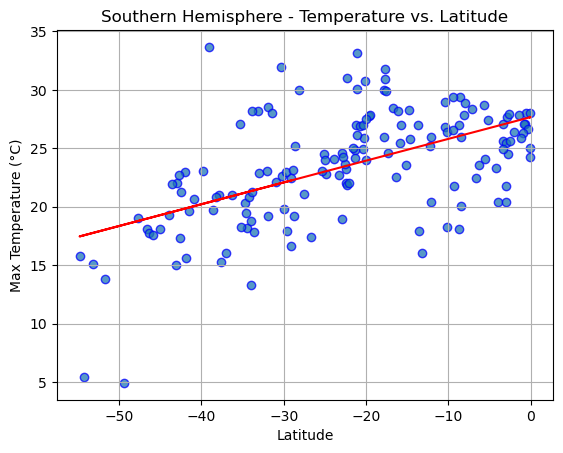

The r-value is: 0.5571062786294105 


In [21]:
# Linear regression on Southern Hemisphere
# <linregress> funciton from scipy.stats library to perform linear regression analysis
# <pe_slope> the slope regression line
# <pe_int> representing the value of y when x is 0 (intercept)
# <pe_r> The correlation coefficient indication strength and direction of 'x_values' and 'y_values'
# <pe_p> The two sides p=value for a hypothesis test whose null hypothesis that the slope is zero
# <pe_std_err> The standard error of the mean
southern_temp_regression = linregress(southern_hemi_df["Lat"], (southern_hemi_df["Max Temp"] - 32) * 5/9)
southern_temp_slope, southern_temp_intercept, southern_temp_r_value, southern_temp_p_value, southern_temp_std_err = southern_temp_regression
southern_temp_regression_line = southern_temp_slope * southern_hemi_df["Lat"] + southern_temp_intercept

# <plt.scatter(x,y)> is used to create a scatter plot
plt.scatter(southern_hemi_df["Lat"], (southern_hemi_df["Max Temp"] - 32) * 5/9, edgecolors='blue', alpha=0.75, label="Southern Hemisphere")
plt.plot(southern_hemi_df["Lat"], southern_temp_slope * southern_hemi_df["Lat"] + southern_temp_intercept, color='red', label="Southern Hemisphere Regression")
annotation_text_1 = f"y = {southern_temp_slope:.2f}x + {southern_temp_intercept:.2f}"
plt.annotate(annotation_text_1, (min(southern_hemi_df["Lat"]), min(southern_hemi_df["Max Temp"])), fontsize=10, color='black')
# plt.title() to title the plot 
plt.title("Southern Hemisphere - Temperature vs. Latitude")
# plt.xlabel() to title the x axis
plt.xlabel("Latitude")
# plt.ylabel() to title the y axis
plt.ylabel("Max Temperature (°C)")
# plt.grid() to add gridlines to the plot
plt.grid(True)

# plt.savefig() to save to the desired folder
plt.savefig("output_data/Southern_Temperature_Lat_Regression.png")
# plt.show() to display the plot 
plt.show()

print(f"The r-value is: {southern_temp_r_value} ")

**Discussion about the linear relationship:** In regards to the relationships between north and south (Temp V Lat) it seems that the lower the number of the latitude is, the chance of the temperature being warmer is expected. Vise Versa the higher the latitude is the colder the temperature will be.

### Humidity vs. Latitude Linear Regression Plot

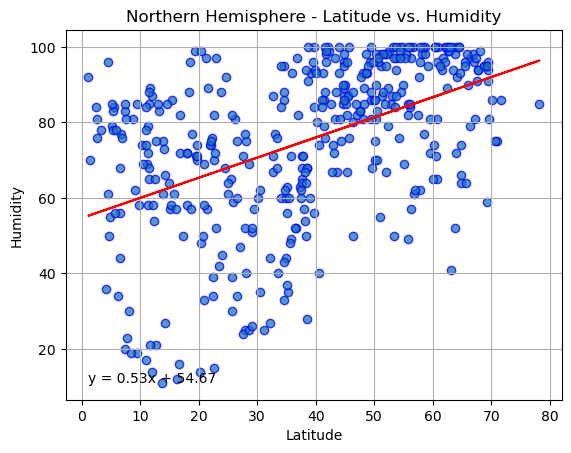

The r-value is: 0.47645635105139494 


In [22]:
# <linregress> funciton from scipy.stats library to perform linear regression analysis
# <pe_slope> the slope regression line
# <pe_int> representing the value of y when x is 0 (intercept)
# <pe_r> The correlation coefficient indication strength and direction of 'x_values' and 'y_values'
# <pe_p> The two sides p=value for a hypothesis test whose null hypothesis that the slope is zero
# <pe_std_err> The standard error of the mean
northern_humidity_regression = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
northern_humidity_slope, northern_humidity_intercept, northern_humidity_r_value, northern_humidity_p_value, northern_humiditystd_err = northern_humidity_regression
northern_humidity_regression_line = northern_humidity_slope * northern_hemi_df["Lat"] + northern_humidity_intercept

# <plt.scatter(x,y)> is used to create a scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], edgecolors='blue', alpha=0.75, label="Northern Hemisphere")
plt.plot(northern_hemi_df["Lat"], northern_humidity_slope * northern_hemi_df["Lat"] + northern_humidity_intercept, color='red', label="Northern Hemisphere Regression")
annotation_text_2 = f"y = {northern_humidity_slope:.2f}x + {northern_humidity_intercept:.2f}"
plt.annotate(annotation_text_2, (min(northern_hemi_df["Lat"]), min(northern_hemi_df["Humidity"])), fontsize=10, color='black')
# plt.title() to title the plot 
plt.title("Northern Hemisphere - Latitude vs. Humidity")
# plt.xlabel() to title the x axis
plt.xlabel("Latitude")
# plt.ylabel() to title the y axis
plt.ylabel("Humidity")
# plt.grid() to add gridlines to the plot
plt.grid(True)

# plt.savefig() to save to the desired folder
plt.savefig("output_data/Northern_Humidity_Lat_Regression.png")
# plt.show() to display the plot 
plt.show()

print(f"The r-value is: {northern_humidity_r_value} ")

### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

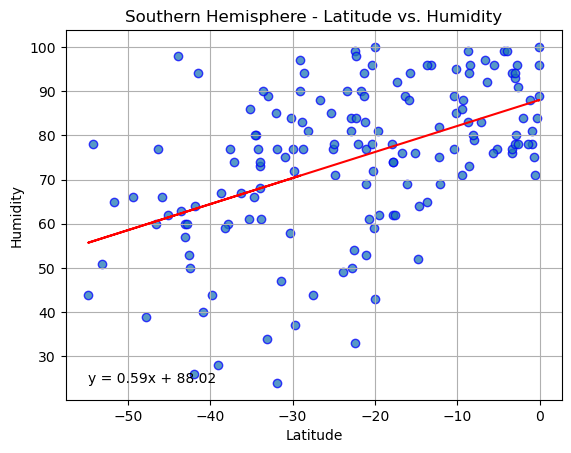

The r-value is: 0.4918535490159352 


In [23]:
# <linregress> funciton from scipy.stats library to perform linear regression analysis
# <pe_slope> the slope regression line
# <pe_int> representing the value of y when x is 0 (intercept)
# <pe_r> The correlation coefficient indication strength and direction of 'x_values' and 'y_values'
# <pe_p> The two sides p=value for a hypothesis test whose null hypothesis that the slope is zero
# <pe_std_err> The standard error of the mean
southern_humidity_regression = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
southern_humidity_slope, southern_humidity_intercept, southern_humidity_r_value, southern_humidity_p_value, southern_humidity_std_err = southern_humidity_regression
southern_humidity_regression_line = southern_humidity_slope * southern_hemi_df["Lat"] + southern_humidity_intercept

# <plt.scatter(x,y)> is used to create a scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolors='blue', alpha=0.75, label="Southern Hemisphere")
plt.plot(southern_hemi_df["Lat"], southern_humidity_slope * southern_hemi_df["Lat"] + southern_humidity_intercept, color='red', label="Southern Hemisphere Regression")
annotation_text_3 = f"y = {southern_humidity_slope:.2f}x + {southern_humidity_intercept:.2f}"
plt.annotate(annotation_text_3, (min(southern_hemi_df["Lat"]), min(southern_hemi_df["Humidity"])), fontsize=10, color='black')
# plt.title() to title the plot 
plt.title("Southern Hemisphere - Latitude vs. Humidity")
# plt.xlabel() to title the x axis
plt.xlabel("Latitude")
# plt.ylabel() to title the y axis
plt.ylabel("Humidity")
# plt.grid() to add gridlines to the plot
plt.grid(True)

# plt.savefig() to save to the desired folder
plt.savefig("output_data/Southern_Humidity_Lat_Regression.png")
# plt.show() to display the plot 
plt.show()

print(f"The r-value is: {southern_humidity_r_value} ")

**Discussion about the linear relationship:** In regards to the relationships between north and south (Humidity V Lat) it seems that the value of the latitude and the humidity will match the path of the latitude. Meaning that the lower the latitude the lower the humidity, the higher the latitude the higher the humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

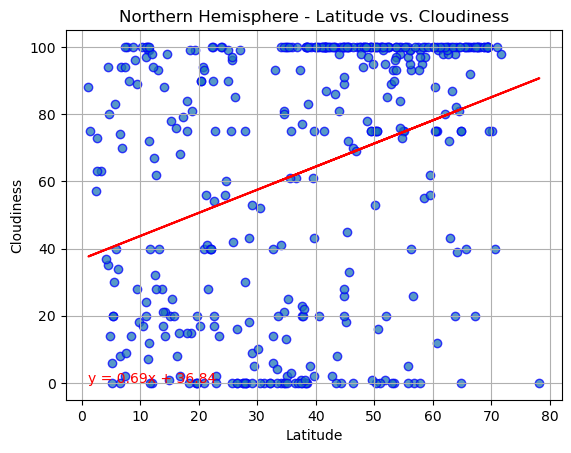

The r-value is: 0.3349860598759764 


In [24]:
# Northern Hemisphere
# <linregress> funciton from scipy.stats library to perform linear regression analysis
# <pe_slope> the slope regression line
# <pe_int> representing the value of y when x is 0 (intercept)
# <pe_r> The correlation coefficient indication strength and direction of 'x_values' and 'y_values'
# <pe_p> The two sides p=value for a hypothesis test whose null hypothesis that the slope is zero
# <pe_std_err> The standard error of the mean
northern_cloudiness_regression = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
northern_cloudiness_slope, northern_cloudiness_intercept, northern_cloudiness_r_value, northern_cloudiness_p_value, northern_cloudiness_std_err = northern_cloudiness_regression
northern_cloudiness_regression_line = northern_cloudiness_slope * northern_hemi_df["Lat"] + northern_cloudiness_intercept

# <plt.scatter(x,y)> is used to create a scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], edgecolors='blue', alpha=0.75, label="Northern Hemisphere")
plt.plot(northern_hemi_df["Lat"], northern_cloudiness_slope * northern_hemi_df["Lat"] + northern_cloudiness_intercept, color='red', label="Northern Hemisphere Regression")
annotation_text_4 = f"y = {northern_cloudiness_slope:.2f}x + {northern_cloudiness_intercept:.2f}"
plt.annotate(annotation_text_4, (min(northern_hemi_df["Lat"]), min(northern_hemi_df["Cloudiness"])), fontsize=10, color='red')
# plt.title() to title the plot 
plt.title("Northern Hemisphere - Latitude vs. Cloudiness")
# plt.xlabel() to title the x axis
plt.xlabel("Latitude")
# plt.ylabel() to title the y axis
plt.ylabel("Cloudiness")
# plt.grid() to add gridlines to the plot
plt.grid(True)

# plt.savefig() to save to the desired folder
plt.savefig("output_data/Northern_Cloudiness_Lat_Regression.png")
# plt.show() to display the plot 
plt.show()

print(f"The r-value is: {northern_cloudiness_r_value} ")

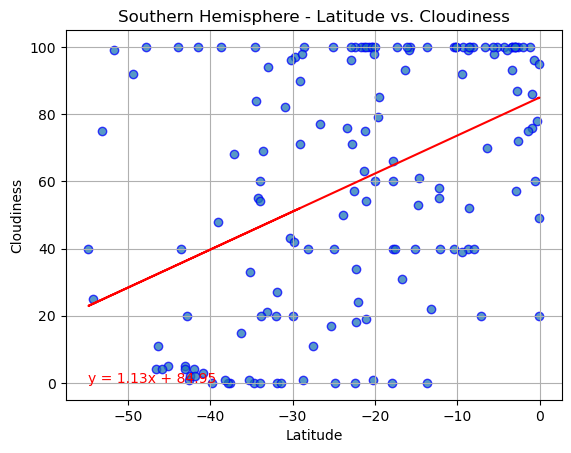

The r-value is: 0.43440287620365936 


In [25]:
# Southern Hemisphere
# <linregress> funciton from scipy.stats library to perform linear regression analysis
# <pe_slope> the slope regression line
# <pe_int> representing the value of y when x is 0 (intercept)
# <pe_r> The correlation coefficient indication strength and direction of 'x_values' and 'y_values'
# <pe_p> The two sides p=value for a hypothesis test whose null hypothesis that the slope is zero
# <pe_std_err> The standard error of the mean
southern_cloudiness_regression = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
southern_cloudiness_slope, southern_cloudiness_intercept, southern_cloudiness_r_value, southern_cloudiness_p_value, southern_cloudiness_std_err = southern_cloudiness_regression
southern_cloudiness_regression_line = southern_cloudiness_slope * southern_hemi_df["Lat"] + southern_cloudiness_intercept

# <plt.scatter(x,y)> is used to create a scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], edgecolors='blue', alpha=0.75, label="Southern Hemisphere")
plt.plot(southern_hemi_df["Lat"], southern_cloudiness_slope * southern_hemi_df["Lat"] + southern_cloudiness_intercept, color='red', label="Southern Hemisphere Regression")
annotation_text_5 = f"y = {southern_cloudiness_slope:.2f}x + {southern_cloudiness_intercept:.2f}"
plt.annotate(annotation_text_5, (min(southern_hemi_df["Lat"]), min(southern_hemi_df["Cloudiness"])), fontsize=10, color='red')
# plt.title() to title the plot 
plt.title("Southern Hemisphere - Latitude vs. Cloudiness")
# plt.xlabel() to title the x axis
plt.xlabel("Latitude")
# plt.ylabel() to title the y axis
plt.ylabel("Cloudiness")
# plt.grid() to add gridlines to the plot
plt.grid(True)

# plt.savefig() to save to the desired folder
plt.savefig("output_data/Southern_Cloudiness_Lat_Regression.png")
# plt.show() to display the plot 
plt.show()

print(f"The r-value is: {southern_cloudiness_r_value} ")

**Discussion about the linear relationship:** In regards to the relationships between north and south (Cloudiness V Lat) it seems that there is no correlation. Meaning that the data is too spread out in the graph. 

### Wind Speed vs. Latitude Linear Regression Plot

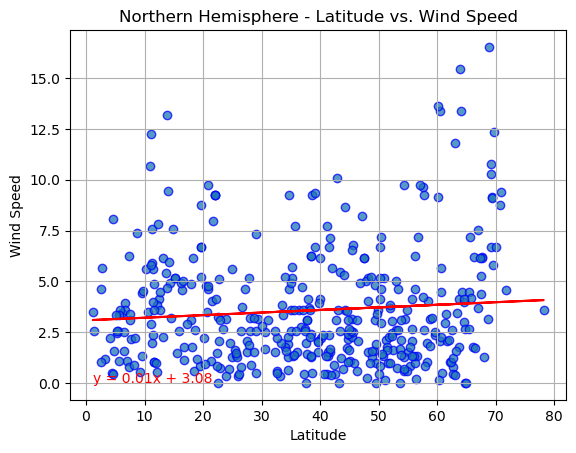

The r-value is: 0.08562223323185686 


In [26]:
# Northern Hemisphere
# <linregress> funciton from scipy.stats library to perform linear regression analysis
# <pe_slope> the slope regression line
# <pe_int> representing the value of y when x is 0 (intercept)
# <pe_r> The correlation coefficient indication strength and direction of 'x_values' and 'y_values'
# <pe_p> The two sides p=value for a hypothesis test whose null hypothesis that the slope is zero
# <pe_std_err> The standard error of the mean
northern_windspeed_regression = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"] * 0.44704)
northern_windspeed_slope, northern_windspeed_intercept, northern_windspeed_r_value, northern_windspeed_p_value, northern_windspeed_std_err = northern_windspeed_regression
northern_windspeed_regression_line = northern_windspeed_slope * northern_hemi_df["Lat"] + northern_windspeed_intercept

# <plt.scatter(x,y)> is used to create a scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"] * 0.44704, edgecolors='blue', alpha=0.75, label="Northern Hemisphere")
plt.plot(northern_hemi_df["Lat"], northern_windspeed_slope * northern_hemi_df["Lat"] + northern_windspeed_intercept, color='red', label="Northern Hemisphere Regression")
annotation_text_6 = f"y = {northern_windspeed_slope:.2f}x + {northern_windspeed_intercept:.2f}"
plt.annotate(annotation_text_6, (min(northern_hemi_df["Lat"]), min(northern_hemi_df["Wind Speed"])), fontsize=10, color='red')
# plt.title() to title the plot 
plt.title("Northern Hemisphere - Latitude vs. Wind Speed")
# plt.xlabel() to title the x axis
plt.xlabel("Latitude")
# plt.ylabel() to title the y axis
plt.ylabel("Wind Speed")
# plt.grid() to add gridlines to the plot
plt.grid(True)

# plt.savefig() to save to the desired folder
plt.savefig("output_data/Northern_WindSpeed_Lat_Regression.png")
# plt.show() to display the plot 
plt.show()

print(f"The r-value is: {northern_windspeed_r_value} ")

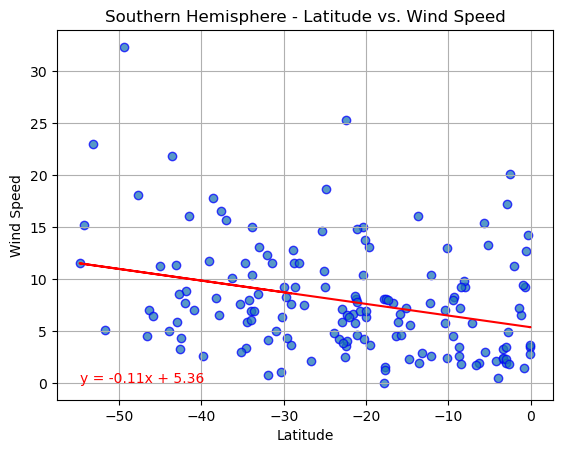

The r-value is: -0.3029232143587401 


In [27]:
# Southern Hemisphere
# <linregress> funciton from scipy.stats library to perform linear regression analysis
# <pe_slope> the slope regression line
# <pe_int> representing the value of y when x is 0 (intercept)
# <pe_r> The correlation coefficient indication strength and direction of 'x_values' and 'y_values'
# <pe_p> The two sides p=value for a hypothesis test whose null hypothesis that the slope is zero
# <pe_std_err> The standard error of the mean
southern_windspeed_regression = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
southern_windspeed_slope, southern_windspeed_intercept, southern_windspeed_r_value, southern_windspeed_p_value, southern_windspeed_std_err = southern_windspeed_regression
southern_windspeed_regression_line = southern_windspeed_slope * southern_hemi_df["Lat"] + southern_windspeed_intercept

# <plt.scatter(x,y)> is used to create a scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], edgecolors='blue', alpha=0.75, label="Southern Hemisphere")
plt.plot(southern_hemi_df["Lat"], southern_windspeed_slope * southern_hemi_df["Lat"] + southern_windspeed_intercept, color='red', label="Southern Hemisphere Regression")
annotation_text_7 = f"y = {southern_windspeed_slope:.2f}x + {southern_windspeed_intercept:.2f}"
plt.annotate(annotation_text_7, (min(southern_hemi_df["Lat"]), min(southern_hemi_df["Wind Speed"])), fontsize=10, color='red')
# plt.title() to title the plot 
plt.title("Southern Hemisphere - Latitude vs. Wind Speed")
# plt.xlabel() to title the x axis
plt.xlabel("Latitude")
# plt.ylabel() to title the y axis
plt.ylabel("Wind Speed")
# plt.grid() to add gridlines to the plot
plt.grid(True)
# plt.savefig() to save to the desired folder

plt.savefig("output_data/Southern_WindSpeed_Lat_Regression.png")
# plt.show() to display the plot 
plt.show()

print(f"The r-value is: {southern_windspeed_r_value} ")

**Discussion about the linear relationship:** In regards to the relationships between north and south (Wind Speed V Lat) it seems that the extremes on both sides have the higher chance in creating wind speeds greater than 15 m/s. 